In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import matplotlib.patches as patches

(1500, 2500)


True

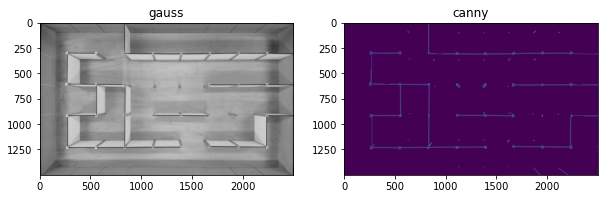

In [81]:
#读取图像
image = cv2.imread('transformed3.jpg')
# cv2.imshow('image',image)
 
fig, axs = plt.subplots(1, 2, figsize=(10, 10))    
    
orig = image.copy()
# plt.subplot(2,2,1)
# plt.title("orig")
# plt.imshow(orig)

 
#图像预处理
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# print(gray.shape)
# plt.subplot(2,2,2)
# plt.title("gray")
# plt.imshow(gray, cmap='gray')
# cv2.imwrite("gray1.jpg", gray)

gauss = cv2.GaussianBlur(gray,(5,5),0)
print(gauss.shape)
plt.subplot(1,2,1)
plt.title("gauss")
plt.imshow(gauss, cmap='gray')

cv2.imwrite('gauss.jpg', gauss)

# ret, binary_image = cv2.threshold(gauss, 50, 255, cv2.THRESH_BINARY)
# print(ret)

# cv2.imwrite('binary_image.jpg', binary_image)



img_canny = cv2.Canny(gauss,120,210)
plt.subplot(1,2,2)
plt.title("canny")
plt.imshow(img_canny)
cv2.imwrite('canny_image.jpg', img_canny)

In [51]:
# def draw_rectangle_on_image(image, point1, point2, point3, point4):
#     """
#     Draws a rectangle on the image using the provided points.

#     Parameters:
#     - image: The input image
#     - point1, point2, point3, point4: The four corner points of the rectangle.
#                                       Each point should be a tuple (x, y).

#     Returns:
#     - Displays the image with the rectangle
#     """

#     fig, ax = plt.subplots(1)
#     ax.imshow(image)

#     # Create a rectangle patch
#     # Using point1 as the starting point and computing width and height based on the other points
#     # Assuming the points are provided in a specific order (top-left, top-right, bottom-right, bottom-left)
#     rect_width = point2[0] - point1[0]
#     rect_height = point3[1] - point1[1]

#     rect = patches.Rectangle(point1, rect_width, rect_height, linewidth=50, edgecolor='r', facecolor='none')

#     # Add the patch to the image
#     ax.add_patch(rect)
    
#     plt.show()

# # Example usage:
# # Assuming 'image' is your loaded image
# # draw_rectangle_on_image(image, (10,10), (10,100), (100,100), (100,10))



In [82]:

result_y = np.zeros((5,9))

#Y detection


def Y_detect(image,result):
    
    img_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    print(image.shape)
    x_len = int(image.shape[0]/5)
#     print(x_len)
    y_len = int(image.shape[1]/9)
#     print(y_len)
    
    x_cord = 0
    y_cord = 0
    
    for m in range(5):
        for n in range(8):
            x_start = x_cord+m*x_len +20
            x_end = x_cord+(m+1)*x_len - 20
            y_start = int(y_cord+(n+1)*y_len)-20
            y_end = int(y_cord+(n+1)*y_len)+21
            
#             print(x_start,x_end,y_start,y_end)
#             plt.imshow(img_rgb)
#             plt.plot([x_start, y_start], [x_start, y_end], color='green', linewidth=2)
#             plt.plot([x_start, y_start], [x_end, y_start], color='green', linewidth=2)
#             plt.plot([y_start, y_end], [x_end, y_end], color='green', linewidth=2)
#             plt.plot([x_end, y_start], [x_end, y_end], color='green', linewidth=2)
            
#             cv2.line(image, (x_start, y_start), (x_start, y_end), (0, 255, 0), 20)
#             cv2.line(image, (x_start, y_start), (x_end, y_start), (0, 255, 0), 20)
#             cv2.line(image, (y_start, y_end), (x_end, y_end), (0, 255, 0), 20)
#             cv2.line(image, (x_end, y_start), (x_end, y_end), (0, 255, 0), 20)
            
            
            
            
            roi = image[x_start:x_end,y_start:y_end]
#             print(roi.shape)

            
            count = np.sum(roi==255)
            print(count)
            if(count>=200):
                result_y[m][n] = 1
#     plt.imshow(img_rgb)
#     plt.show()
    
Y_detect(img_canny,result_y)
np.savetxt('array_y.txt', result_y, fmt='%d', delimiter=' ')
    
    

(1500, 2500)
0
0
520
11
25
0
0
0
372
0
0
25
59
13
0
0
9
526
523
81
155
67
32
26
310
61
535
42
84
88
35
504
162
180
156
186
192
72
113
127


In [83]:

result_x = np.zeros((5,9))

#X detection


def X_detect(image,result):
#     print(image.shape)
    x_len = int(image.shape[0]/5)
#     print(x_len)
    y_len = image.shape[1]/9
#     print(y_len)
    
    x_cord = 0
    y_cord = 0
    
    for m in range(4):
        for n in range(9):
            x_start = int(x_cord+(m+1)*x_len)-30
            x_end = int(x_cord+(m+1)*x_len)+31
            y_start = int(y_cord+(n)*y_len)+10
            y_end = int(y_cord+(n+1)*y_len)-10
            
            print(x_start,x_end,y_start,y_end)
            
            roi = image[x_start:x_end,y_start:y_end]
#             print(roi.shape)

            
            count = np.sum(roi==255)
            print(count)
            if(count>=200):
                result_x[m][n] = 1
    
    
X_detect(img_canny,result_x)
np.savetxt('array_x.txt', result_x, fmt='%d', delimiter=' ')
    
    

270 331 10 267
85
270 331 287 545
542
270 331 565 823
0
270 331 843 1101
461
270 331 1121 1378
534
270 331 1398 1656
547
270 331 1676 1934
546
270 331 1954 2212
570
270 331 2232 2490
354
570 631 10 267
138
570 631 287 545
480
570 631 565 823
518
570 631 843 1101
26
570 631 1121 1378
124
570 631 1398 1656
42
570 631 1676 1934
526
570 631 1954 2212
541
570 631 2232 2490
513
870 931 10 267
80
870 931 287 545
524
870 931 565 823
40
870 931 843 1101
7
870 931 1121 1378
548
870 931 1398 1656
582
870 931 1676 1934
30
870 931 1954 2212
52
870 931 2232 2490
475
1170 1231 10 267
32
1170 1231 287 545
293
1170 1231 565 823
260
1170 1231 843 1101
473
1170 1231 1121 1378
518
1170 1231 1398 1656
60
1170 1231 1676 1934
527
1170 1231 1954 2212
546
1170 1231 2232 2490
104


In [84]:
#transfer to ASCII
def get_result(result_x, result_y):
    Heng = "---"
    Shu = "  |"
    Kong = "   "

    result = [
        ["",Heng, Heng ,Heng ,Heng, Heng ,Heng ,Heng ,Heng ,Heng ,""],
        ["|",Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong," ","|"],
        ["",Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong,""],
        ["|",Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong," ","|"],
        ["",Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong,""],
        ["|",Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong," ","|"],
        ["",Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong,""],
        ["|",Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong," ","|"],
        ["",Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong,""],
        ["|",Kong,Kong,Kong,Kong,Kong,Kong,Kong,Kong," ","|"],
        ["",Heng, Heng ,Heng ,Heng, Heng ,Heng ,Heng ,Heng ,Heng ,""]

    ]
    # read result_x
    for m in range(4):
        for n in range(9):
            if(result_x[m][n] == 1):
                result[2*m+2][n+1] = Heng 

    #read result_y
    for m in range(5):
        for n in range(8):
            if(result_y[m][n] == 1):
                result[2*m+1][n+1] = Shu
    
    return result
    

    
test = get_result(result_x,result_y)
# 打印数组
for row in test:
    for col in row:
        print(col, end=' ')
    print()  # 换行

 --- --- --- --- --- --- --- --- ---  
|           |                       | 
     ---     --- --- --- --- --- ---  
|   |                               | 
     --- ---             --- --- ---  
|       |   |                       | 
     ---         --- ---         ---  
|   |       |                   |   | 
     --- --- --- ---     --- ---      
|                                   | 
 --- --- --- --- --- --- --- --- ---  


 --- --- --- --- --- --- --- --- ---  
|                                     | 
                                      
|                                     | 
                                      
|                                     | 
                                      
|                                     | 
                                      
|                                     | 
                                      
 --- --- --- --- --- --- --- --- ---  
